In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [13]:
#Load datasets
def load_data() -> list:
    X_train_ = pd.read_csv('train_data.csv', header=None)
    y_labels = pd.read_csv('train_labels.csv', header=None)
    X_test_ = pd.read_csv('test_data.csv', header=None)
    return[X_train_, y_labels, X_test_]
X, y, X_test_data = load_data()

In [14]:
#Show dimension of datasets
print('Dimension of training data:', X.shape)
print('Dimension of training labels:', y.shape)
print('Dimension of test data:', X_test_data.shape)

Dimension of training data: (3750, 10000)
Dimension of training labels: (3750, 1)
Dimension of test data: (1250, 10000)


In [23]:
#Show descriptive statistics
print('Descriptive statistics of training data:', X.describe())
print('Descriptive statistics of labels:', y.describe())
print('Descriptive statistics of test data:', X_test_data.describe())

Descriptive statistics of training data:               0            1              2              3             4     \
count  3750.000000  3750.000000    3750.000000    3750.000000   3750.000000   
mean     30.644135     9.080955     169.679419     811.083532   -186.008805   
std     286.172414   213.166659   43665.003613   57123.457110  21942.466227   
min    -989.450000  -859.922000 -163336.428000 -243844.632000 -77566.109000   
25%    -163.781750  -135.343500  -29284.119500  -38028.429000 -14426.799500   
50%      35.478500     2.680500    1181.698500     980.588000   -154.835000   
75%     215.780500   156.095750   29630.914500   40561.960250  14515.833000   
max    1224.394000   722.868000  177744.241000  215372.854000  86287.955000   

              5            6            7            8            9     ...  \
count  3750.000000  3750.000000  3750.000000  3750.000000  3750.000000  ...   
mean     25.717789    24.918118    19.061259    14.826002    14.970447  ...   
std     71

In [17]:
#Function for searching missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [22]:
#Show missing values
missing_values_table(X)
missing_values_table(y)
missing_values_table(X_test_data)

Your selected dataframe has 10000 columns.
There are 0 columns that have missing values.
Your selected dataframe has 1 columns.
There are 0 columns that have missing values.
Your selected dataframe has 10000 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


AxesSubplot(0.125,0.125;0.775x0.755)


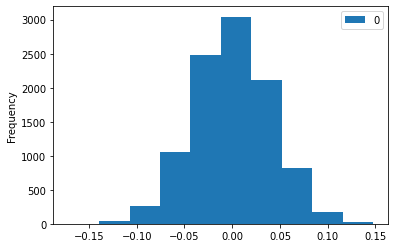

In [48]:
#Count skewness of training data and show histogram with this distribution
skew_df = pd.DataFrame(X.skew())
print(skew_df.plot.hist())

In [55]:
#Count values of training labels
print('Values of training labels:', y.value_counts())

Values of training labels:  1    3375
-1     375
dtype: int64


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ae6d556f-9829-4201-b0d0-4c143a3266cf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>